Link de los datos: https://data.humdata.org/dataset/novel-coronavirus-2019-ncov-cases

In [170]:
import pandas as pd
import matplotlib.pyplot as plt

data_c = pd.read_csv('time_series_2019-ncov-Confirmed.csv')
data_d = pd.read_csv('time_series_2019-ncov-Deaths.csv')
data_r = pd.read_csv('time_series_2019-ncov-Recovered.csv')

Reviso la información del archivo

In [171]:
data_c.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20',
       '3/21/20'],
      dtype='object')

Elimino las primeras 4 columnas y la fila con los labels.

In [172]:
data_filt_conf = data_c.drop(index=[0],columns=['Province/State',
                      'Country/Region','Lat','Long'])

data_filt_d = data_d.drop(index=[0],columns=['Province/State',
                      'Country/Region','Lat','Long'])

data_filt_r = data_r.drop(index=[0],columns=['Province/State',
                      'Country/Region','Lat','Long'])
data_n = data_filt_conf.values
data_d = data_filt_d.values
data_r = data_filt_r.values

In [173]:
paises = data[['Country/Region']].values.tolist() # me quedo con los países.

def i_pais(paises,pais):                          # funcion que encuentra el pais en la bd
    for j,i in enumerate(paises):
        if i == [pais]:
            pos = j
       
    return pos

Elijo los paises de interés:

In [174]:
pais1 = ['Argentina','Brazil'] # insertar paises en inglés
nro_pos = np.int32(np.zeros(len(pais1))) 
j = 0
for i in pais1:
    #print('pais:',i)    
    ii = i_pais(paises,i)
    #print('indice:',ii)
    nro_pos[j]= ii
    j=j+1    

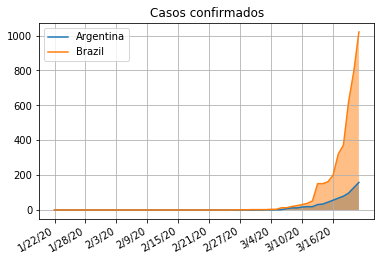

In [175]:
for i in np.arange(0,len(nro_pos)): 
    plt.plot(data_col,data_n[nro_pos[i]-1,:],label=pais1[i])
    plt.fill_between(data_col, 0, data_n[nro_pos[i]-1,:], alpha=0.5)
    
plt.title('Casos confirmados')
plt.grid()
plt.legend()
plt.xticks(np.arange(0,len(data_col),6))
plt.gcf().autofmt_xdate()
plt.savefig('confirmed_cases.pdf')

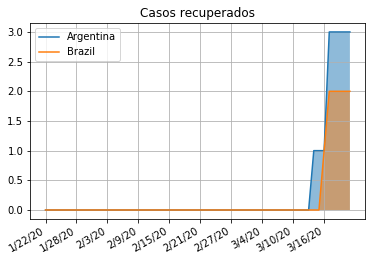

In [176]:
for i in np.arange(0,len(nro_pos)): 
    plt.plot(data_col,data_r[nro_pos[i]-1,:],label=pais1[i])
    plt.fill_between(data_col, 0, data_r[nro_pos[i]-1,:], alpha=0.5)

plt.title('Casos recuperados')
plt.grid()
plt.legend()
plt.xticks(np.arange(0,len(data_col),6))
plt.gcf().autofmt_xdate()
plt.savefig('confirmed_recovered.pdf')

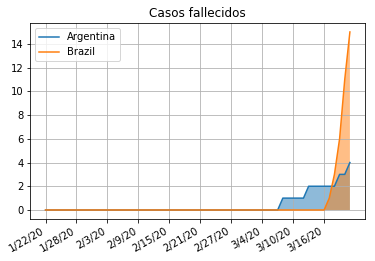

In [177]:
for i in np.arange(0,len(nro_pos)): 
    plt.plot(data_col,data_d[nro_pos[i]-1,:],label=pais1[i])
    plt.fill_between(data_col, 0, data_d[nro_pos[i]-1,:], alpha=0.5)
    
plt.title('Casos fallecidos')
plt.grid()
plt.legend()
plt.xticks(np.arange(0,len(data_col),6))
plt.gcf().autofmt_xdate()
plt.savefig('confirmed_deaths.pdf')